# Healthcare Insurance Cost Analysis

## Project Overview

### Objectives

- Load and clean the healthcare insurance dataset from Kaggle.  
- Visualise relationships between insurance charges and factors such as age, smoking status, gender, BMI, and geographic region.  
- Engineer features such as BMI categories and region flags for further analysis.  
- Prepare insights to support predictive modelling of insurance charges.

### Inputs

- `insurance.csv` dataset downloaded from Kaggle:  
  [https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance)

### Outputs

- Cleaned and transformed dataset saved as a DataFrame for analysis.  
- Visualisations illustrating key relationships between variables (scatter plots, boxplots).  
- Feature-engineered columns such as BMI categories and one-hot encoded regions.  
- Summary statistics and correlation matrices for exploratory data analysis.

### Additional Comments

- Visualisations use Plotly, Matplotlib, and Seaborn for interactivity and style variety.  
- Further modelling and prediction will be done in subsequent notebooks or scripts.  
- Ensure consistent data paths and environment setup before running the notebook.





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [22]:
!python --version

Python 3.12.8


In [23]:
import os
current_dir = os.getcwd()
current_dir

'/Users/aminaibrahim/Documents/vscode-projects/Helathcare-project/Project-1--Healthcare/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [24]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [25]:
current_dir = os.getcwd()
current_dir

'/Users/aminaibrahim/Documents/vscode-projects/Helathcare-project/Project-1--Healthcare'

# Section 1


## Extracting Data

In this section, I:

- Imported all required Python libraries for data analysis and visualisation (pandas, NumPy, Matplotlib, Seaborn, Plotly).
- Loaded the dataset from the `data` folder.
- Displayed the first few rows of the dataset to understand its structure.
- Checked the column types and number of non-null values using `.info()`.
- Used `.describe()` to generate summary statistics for numerical variables.---

Import the data.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Extract the data

In [7]:
df = pd.read_csv('../data/cleaned_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,Overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,Obese
2,28,0,33.000,3,0,4449.46200,False,True,False,Obese
3,33,0,22.705,0,0,21984.47061,True,False,False,Normal
4,32,0,28.880,0,0,3866.85520,True,False,False,Overweight


Find out basic information about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
 9   bmi_category      1337 non-null   object 
dtypes: bool(3), float64(2), int64(4), object(1)
memory usage: 77.2+ KB


In [9]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


---

# Section 2

## Transforming Data

In this section, I:
- Handle missing values if applicable.
- Check for duplicated records and remove them if necessary to ensure data quality.

Check for any missing data.

In [10]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
bmi_category        0
dtype: int64

Check for duplicate rows. 

In [11]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


---

# Section 3

## Visualising Data

In this section, I:

Explored relationships within the insurance dataset using scatter plots, box plots, and bar charts.

Created a scatter plot showing how insurance charges vary with age, distinguished by smoking status.

Displayed a box plot comparing insurance charges across genders.

Presented a bar chart comparing the average insurance charges between smokers and non-smokers.

Interpreted these visualisations to identify key patterns related to age, gender, and smoking behaviour impacting insurance costs.

In [33]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'


In [12]:
import sys
print(sys.executable)

/Users/aminaibrahim/Documents/vscode-projects/Helathcare-project/Project-1--Healthcare/.venv/bin/python


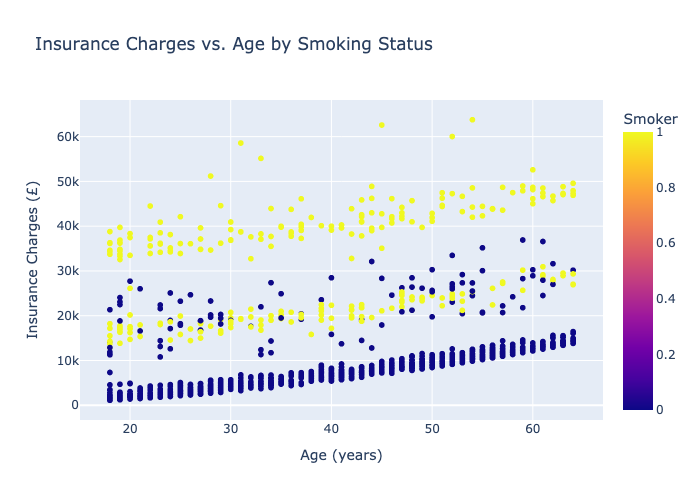

In [ ]:
#static version for github preview
fig.write_image("plot.png")
from IPython.display import Image
Image("plot.png")                

In [ ]:

# Plot 1: Plotly scatter plot (with PNG export)

# Visualise Insurance Charges vs Age by Smoking Status
fig = px.scatter(
    df, x='age', y='charges', color='smoker',
    title='Insurance Charges vs. Age by Smoking Status',
    labels={'age': 'Age (years)', 'charges': 'Insurance Charges (£)', 'smoker': ' Smoker'}
)
fig.show()

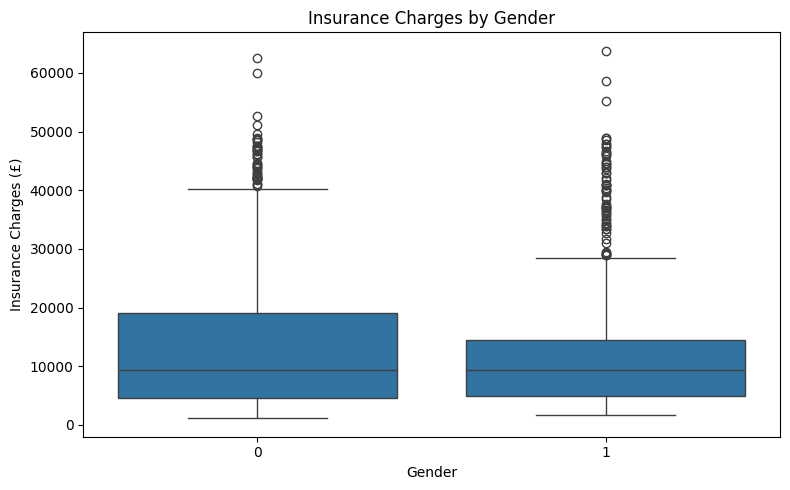

In [33]:
# Boxplot of Insurance Charges by Gender
plt.figure(figsize=(8, 5))  # Set figure size

sns.boxplot(x='sex', y='charges', data=df)
plt.title('Insurance Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Insurance Charges (£)')

plt.tight_layout()
plt.show()

In [34]:
average_smoker_charges = df.groupby('smoker', as_index=False)['charges'].mean()

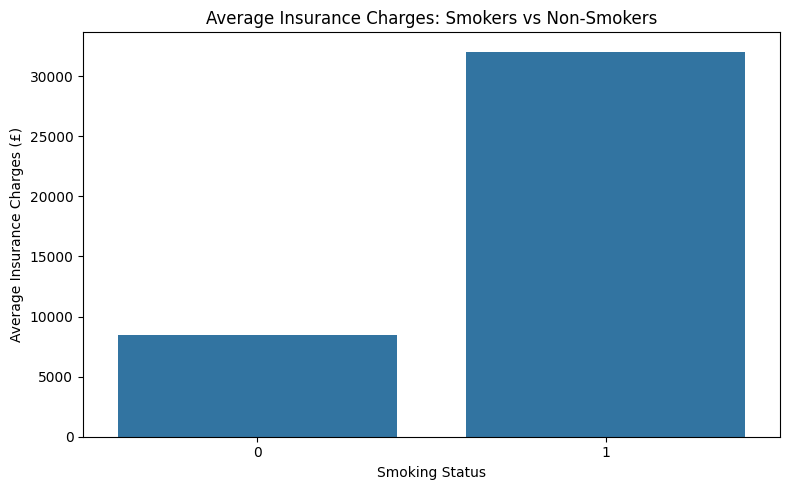

In [35]:
# Barplot to calculate average charges for each smoking status
average_smoker_charges = df.groupby('smoker', as_index=False)['charges'].mean()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='smoker', y='charges', data=average_smoker_charges)
plt.title('Average Insurance Charges: Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Average Insurance Charges (£)')
plt.tight_layout()
plt.show()

In [36]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category'],
      dtype='object')

# Section 4

## Insights and Findings

From the visualisations and analysis, several key insights have emerged about the insurance charges in the dataset:

**Age and Insurance Charges: There is a clear upward trend showing that insurance charges tend to increase as people get older. This makes sense given that health risks often rise with age.

**Impact of Smoking: Smokers face significantly higher insurance charges compared to non-smokers. The difference is quite striking and highlights how smoking status is a major factor in determining insurance costs.

**Gender Differences: The box plot reveals some variation in insurance charges between males and females. While there is some overlap, on average, one gender tends to have slightly higher charges than the other, indicating potential gender-related risk factors.

**Smoking Status Distribution: The bar chart further emphasises the gap in average charges between smokers and non-smokers, confirming that insurers place a considerable premium on smoking habits.

Overall, these insights suggest that age and smoking status are the strongest drivers of insurance charges in this dataset, with gender playing a smaller but noticeable role. Understanding these patterns can help insurers better assess risk and enable customers to make more informed decisions about their health and insurance coverage.

# Section 5

## Conclusion

This project has explored how various factors such as age, smoking status, and gender influence insurance charges. The analysis clearly shows that smoking significantly increases insurance costs, and charges tend to rise with age. Gender also plays a role, though its impact is less pronounced. These findings align with common industry knowledge and reinforce the importance of lifestyle and demographic factors in insurance pricing.

By visualising the data through scatter plots, box plots, and bar charts, we have gained a deeper understanding of the relationships within the dataset and identified key drivers of insurance costs.

### Next Steps

To build on this analysis, future work could include:

- **Incorporating More Variables:** Examining other factors such as pre-existing medical conditions, occupation, or physical activity levels to gain a more comprehensive risk profile.
- **Predictive Modelling:** Developing regression or machine learning models to predict insurance charges based on individual characteristics, enabling personalised premium estimates.
- **Temporal Analysis:** Investigating how insurance charges and risk factors change over time with longitudinal data.
- **Customer Segmentation:** Grouping customers into segments with similar risk profiles to tailor insurance products and pricing strategies.

By pursuing these next steps, insurers can enhance their risk assessment processes and customers can better understand the factors affecting their insurance costs.